## Cargar los datos

In [11]:
import pandas as pd

file_path = 'traffic_simulation_data.csv' 
df = pd.read_csv(file_path)


df = df.drop(columns=['Unnamed: 0'])
 
# Obtener los nombres de las columnas como un array
column_names = df.columns.to_list()
df

,cars_semaphore_delay,cars_delay,walker_semaphore_delay,walkers_delay
0,4.030,35.840,2.860,29.570
1,2.680,24.650,2.120,21.860
2,3.890,20.670,0.960,25.770
3,4.770,24.390,3.030,13.760
4,1.590,22.940,3.330,14.790
...,...,...,...,...
395,2.410,31.810,3.230,23.760
396,1.070,33.970,0.630,15.760
397,5.050,24.900,4.100,15.580
398,1.600,28.550,3.120,7.730


In [12]:
import pandas as pd

pd.set_option('display.float_format', '{:.3f}'.format)
df.describe()

,cars_semaphore_delay,cars_delay,walker_semaphore_delay,walkers_delay
count,400.000,400.000,400.000,400.000
mean,3.039,29.795,2.016,19.993
std,1.035,6.968,1.029,4.958
min,-0.120,9.310,-1.560,6.700
25%,2.335,25.098,1.320,16.435
50%,3.025,29.550,2.035,19.925
75%,3.730,34.612,2.695,23.492
max,6.470,49.150,4.830,38.480


## Mostrar histograma con los datos

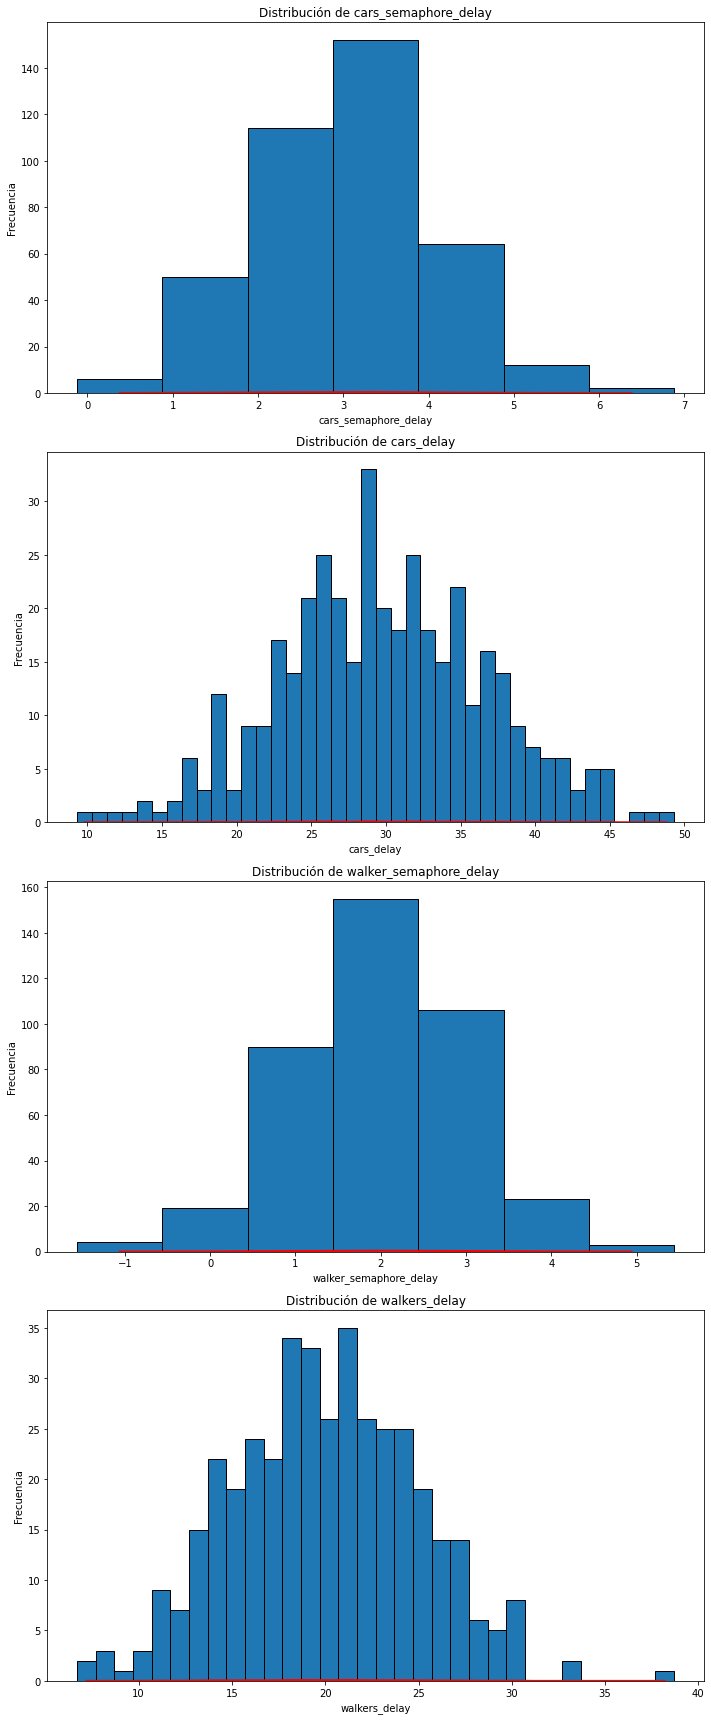

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Assuming you have your DataFrame loaded as 'df'

fig, axes = plt.subplots(len(df.columns), 1, figsize=(10, 6*len(df.columns)))

for i, column in enumerate(df.columns):
    values = df[column].values.flatten()  # Flatten the array
    n, bins, patches = axes[i].hist(values, bins=np.arange(min(values), max(values)+1, 1), edgecolor='black')
    
    # Add a kernel density estimation
    density = np.histogram(values, bins=bins, density=True)[0]
    axes[i].plot((bins[:-1] + bins[1:]) / 2, density, 'r-', linewidth=2)
    
    axes[i].set_title(f'Distribución de {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

# If you want to save the plots as separate figures
for i, column in enumerate(df.columns):
    fig, ax = plt.subplots(figsize=(10, 6))
    values = df[column].values.flatten()
    n, bins, patches = ax.hist(values, bins=np.arange(min(values), max(values)+1, 1), edgecolor='black')
    
    # Add a kernel density estimation
    density = np.histogram(values, bins=bins, density=True)[0]
    ax.plot((bins[:-1] + bins[1:]) / 2, density, 'r-', linewidth=2)
    
    ax.set_title(f'Distribución de {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frecuencia')
    
    # plt.savefig(f'{column}_distribution.png')
    plt.close(fig)

Como podemos apreciar, ninguna de nuestras variables tiene un comportamiento normal

## Análisis de normalidad

In [14]:
for x in df.columns:
    print(f"El kurtosis de {x} es {df[x].kurtosis()}")
    print(f"La Asimetría de {x} es {df[x].skew()}")

El kurtosis de cars_semaphore_delay es 0.1860398245374748
La Asimetría de cars_semaphore_delay es 0.1516149309242259
El kurtosis de cars_delay es -0.11555460220060843
La Asimetría de cars_delay es 0.008772984186610747
El kurtosis de walker_semaphore_delay es 0.3728978719914666
La Asimetría de walker_semaphore_delay es -0.17959013325158565
El kurtosis de walkers_delay es -0.011657480578791013
La Asimetría de walkers_delay es 0.0896822569436807


### Test de Normalidad

In [15]:
from scipy.stats import kstest, shapiro


for x in df.columns:
    test = df[x].sample(100)
    D, p_value = kstest(test, 'norm')
    print(x)    
    print(f"D = {D}")
    print(f"p-value = {p_value}")
    print()

cars_semaphore_delay
D = 0.87352134213628
p-value = 3.8513688968797334e-90

cars_delay
D = 1.0
p-value = 0.0

walker_semaphore_delay
D = 0.7232670569628273
p-value = 1.1046792826126765e-53

walkers_delay
D = 0.9999999999999947
p-value = 0.0



## Matriz de Correlación

Mediante la matriz de correlación veremos la relación entre las variables y nos dará una idea de las variables a seleccionar

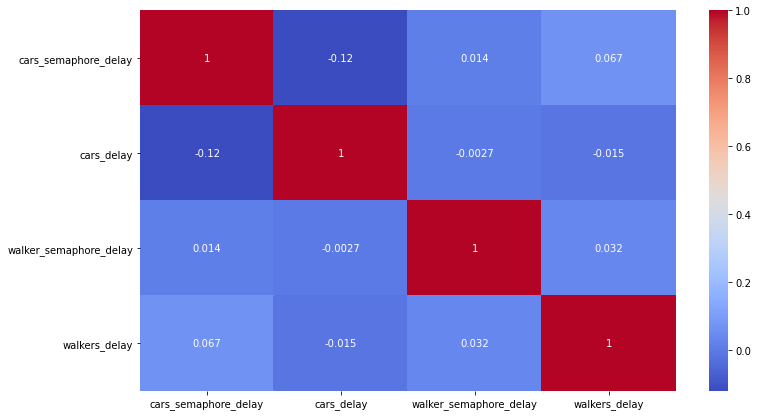

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr()
# print(correlation_matrix)

fig, ax = plt.subplots(figsize=(12, 7)) 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()
